# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: In PCA, we reduce the number of dimensions. This is done by finding out PC1, PC2...dimensions. PC1 is the dimension with most variance of data, PC2 the next dimension with second best variance and so on.

Looking at the data....
1) My guess for first PCA dimension can be the features with maximum spread of data with high standard deviation eg.. Fresh, milk and Grocery, seems to have high values and large mean and large std dev which means large spread of data. They will mainly dominate the PC dimensions. 

###PCA

Scaled data
[[ 0.11294004  0.13072723  0.08146416  0.0031063   0.0654272   0.02784731]
 [ 0.06289903  0.13282409  0.10309667  0.02854842  0.08058985  0.03698373]
 [ 0.05662161  0.11918086  0.08278992  0.03911643  0.08605232  0.16355861]
 [ 0.11825445  0.01553586  0.04546385  0.10484189  0.01234568  0.03723404]
 [ 0.20162642  0.07291369  0.07755155  0.063934    0.04345483  0.10809345]]
PCA Components
[[-0.018545    0.49047312  0.57644674 -0.01741587  0.647882    0.08213992]
 [-0.86387717 -0.18182434  0.00363933 -0.39690977  0.12652721 -0.21701704]
 [ 0.50178356 -0.33371506  0.08680857 -0.65833746  0.22070584 -0.38365676]
 [-0.02403365 -0.62796031  0.19740892  0.60521878  0.35050483 -0.27744285]
 [-0.00662714 -0.46794556  0.20894177 -0.20580297  0.05718506  0.83168587]
 [-0.03104894 -0.0412685   0.75995608 -0.01031851 -0.6240232  -0.17403508]]
PCA Varianced Ratio
[ 0.51948323  0.26407007  0.106061    0.06258016  0.03497422  0.01283132]
New dataset
(440, 3)
[[ 10698 -12709   3727]
 [ 1244

c:\python27\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


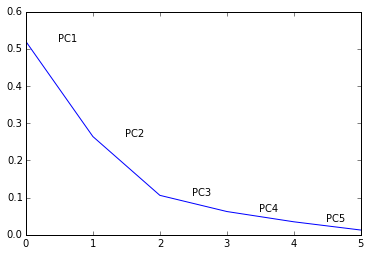

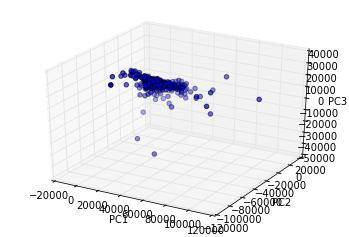

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

#convert to numpy array 
data=np.float64(data)

#scale the data before applying PCA
scaler = MinMaxScaler()
scaledData = scaler.fit_transform(data)

print "Scaled data"
print scaledData[:5]

#Apply PCA

pca = PCA()
pca.fit(scaledData)

# Print the components and the amount of variance in the data contained in each dimension
print "PCA Components"
print pca.components_
print "PCA Varianced Ratio"
print pca.explained_variance_ratio_

for i in range(0,5):
    plt.annotate('PC' + str(i+1),xy=(i+.5,pca.explained_variance_ratio_[i]))
plt.plot(pca.explained_variance_ratio_)

#After analysing taking only 3 components
pca = PCA(n_components = 3)
pca.fit(scaledData)

print "New dataset"
newData = pca.transform(data)
newData = np.int64(newData)
print newData.shape

print newData[:10]

#draw a scatter plot with 3 dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = newData[:,[0]]
y = newData[:,[1]]
z = newData[:,[2]]

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')


ax.scatter(x,y,z)




**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: As shown in the digram for explained variance ratio, there is a huge drop in variance till PC2 and after that it sorts of stabilize. Looking at the graph most of the variance will be covered by PC1, PC2, PC3 (approx 90%) so I will be taking PC1, PC2 and PC3 as my dimensions

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Lets only concentrate on the first 3 principal components since they provide the maximum variance in data. Taking .5 or above loaders in components.
        Fresh       Milk        Grocery     Frozen       Detergents_Paper  Delicatessen
PC1 : [-0.018545    0.49047312  0.57644674  -0.01741587  0.647882          0.08213992]
PC2 : [-0.86387717 -0.18182434  0.00363933  -0.39690977  0.12652721        -0.21701704]
PC3 : [ 0.50178356 -0.33371506  0.08680857  -0.65833746  0.22070584        -0.38365676]

Above are the coefficients for 3 components.
Principal Component 1
Looking at PC1 coefficients, Milk, Grocery and Detergents_paper dominate the variance of data. Since all are positive therefore the first PC1 score increases with the increase in Milk, Grocery and Detergents_paper. If one increases the other 2 also increases. So in this dimension the annual spending for clients is highly affected by Detergents_Paper, Grocery and Milk.  

Principal Component 2
Here Fresh dominates the component and seems like clients have a lot of buying for Fresh items.

Principal Component 3
Here we can see that Fresh and Frozen are invesely related so higher annual spending on Fresh seems to reduce the spending on Frozen by clients and vice-versa.


###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA()

#data is already adjusted above using MinMaxScaler
ica.fit(scaledData)

# Print the independent components
print ica.components_

[[ 0.03853261  0.54388874 -0.16280993 -0.00796398  0.10872827 -0.26649147]
 [-0.02739071  0.21199832  1.04696149 -0.09263954 -1.13716328 -0.28044286]
 [-0.44541029  0.07333893  0.08474204  0.04101321 -0.10236417  0.03858776]
 [-0.09615742 -0.01581707  0.08341565  0.67830316 -0.02555605 -0.2847388 ]
 [-0.04414689 -0.02232292 -0.06619554 -0.03168477  0.02492801  0.87309021]
 [-0.01660878  0.47769036 -0.87651893 -0.01560165  0.19154327 -0.07999962]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA transforms each vector or feature into independent vectors with no corelation whatsoever with the other ICA vector. 

        Fresh         Milk       Grocery     Frozen     Detergents_Paper  Delicatessen
ICA1 : [ 0.04333912  0.01612432  0.05572712  0.03176696 -0.02081737      -0.86735708]
ICA2 : [ 0.01721693  0.72311694 -0.53889526 -0.02215674  0.13515269      -0.2904316 ]
ICA3 : [ 0.4458909  -0.06308901 -0.05796242 -0.04121706  0.0841773       -0.0500125 ]
ICA4 : [ 0.0970305   0.01031359 -0.07181442 -0.67817688  0.02266067       0.28534983]
ICA5 : [-0.02362195  0.1385175  -0.59548473 -0.02507836  0.03224109       0.06957115]
ICA6 : [-0.03361661  0.16923838  1.11928971 -0.08898534 -1.15154917      -0.27475955]

ICA1
In the first vector Delicatessen has a lot of weight and is influenced by it. It can refer to stores or restuarents who serve ready made cooked food.

ICA2
This is mainly influenced by Milk and negative influenced by Grocery. So probably corresponds to Milk or dairy industries who are more interested in Milk therefore lesser impact on Grocery or by general stores who keep grocery products and do not provide milk products.

ICA3
This is influenced by Fresh and can symbolize shops providing fresh products, like bakery or cake shops

ICA4
Mainly influenced by Frozen item and can be used by industries like ice creams, vegetable sellers, even dairy

ICA5
influenced by Grocery, so can deduce for industries or shops like general stores.

ICA6
Grocery and Detergent paper. Grocery invesely proportionate with Detergents_Paper. Washing machine or toilet product industries, laundary  or general stores 

These components can be used to identify or guess which industry is asking for which products. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: Here are some of the advantages of using K Means clustering or Gaussian Mixture Models
1) They are very simple algorithm with low computation cost, fast and effective. FOr large number of data points it uses less iterations to find out the cluster
2) 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
pca.fit(scaledData)
reduced_data = pca.transform(data)
reduced_data = np.float64(reduced_data)
print reduced_data[:10]  # print upto 10 elements

[[ 10698.05509204 -12709.48833465]
 [ 12444.64759285  -8513.25591167]
 [ 11511.92784551  -9273.61172404]
 [  3137.46598834 -14526.99418283]
 [  7892.19339745 -22948.22815388]
 [  8101.52043467  -9966.70097994]
 [  7435.48572054 -10943.01772832]
 [ 10057.0060292   -8213.12933584]
 [  6413.8558184   -5906.26463656]
 [ 21175.8630962   -7112.44105503]]


In [6]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = KMeans(n_clusters=3)
clusters.fit(reduced_data)

print "cluster centre"
print clusters.cluster_centers_ 
print clusters

cluster centre
[[  6166.232683    -8870.55887716]
 [ 34500.0759442   -9759.04432548]
 [  6740.64936912 -35386.5183626 ]]
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [7]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [8]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_ 
print centroids

[[  6166.232683    -8870.55887716]
 [ 34500.0759442   -9759.04432548]
 [  6740.64936912 -35386.5183626 ]]


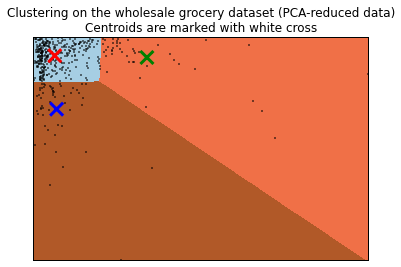

In [9]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='rgb', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: I have identified 3 cluster based on the visualization of data for PCA as above. Here is the description for each central objects

1) Green : [  5919.82061921  -8807.15568795]
Most of the points are around this point. These are the points where the annual revenue was mainly from Grocery, milk and Detergent_paper and Fresh products with moderate buying for these buying by the customers. Looking at this we can say that most of the customers bought Grocery, milk, Detergent_paper and Fresh items. So customers like Dairy farms, laundry industry, general stores, ice cream parlours etc.


2) Red :   [ 32756.28201125 -10063.52935606]
Few points lie in this area. These seems to be the years where customers bought large amount of Grocery, milk and Detergent_paper. Customers like Dairy farms, general stores were more prominent here

3) Blue :  [ 6740.64936912 -35386.5183626 ]
Few points lie in this area. These seems to be the years where customers bought large amounts of Fresh products. FResh products more demand in these years

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PC and kmeans gave me most insights into the data. Through PCA I was able to find the correlation and reduce the dimension to properly understand the variuos aspects of data, and then through kmeans I was able to guess which all customers are those to focus on

**9)** How would you use that technique to help the company design new experiments?

Answer: Looking at the outliers( the 2 cluster with less number of points), it seems that there are customers who have huge demand for fresh items and there is another segment of customer who has huge demand for grocery,milk and detergent_paper. But most of the customers are from smaller segment. Looking at this, we should not loose out on the smaller shop vendors as they are the ones who form the bulk.  

**10)** How would you use that data to help you predict future customer needs?


Answer: Grocey, milk, detergent_paper and fresh will be my list of items that will be on my priority. 